# Imports

In [15]:
import numpy as np
import glob
import cv2
import pandas as pd
from keras.preprocessing import image
from matplotlib import pyplot as plt
from PIL import Image,ImageOps
from scipy.ndimage import imread


# Reading Image 

['/home/mahinour/Collage/Computer Vision/Vision Projects/Computer Vision  assignments/Coins Detection Using Hough Transform/Coins/coins_1.jpg', '/home/mahinour/Collage/Computer Vision/Vision Projects/Computer Vision  assignments/Coins Detection Using Hough Transform/Coins/coins_4.jpg', '/home/mahinour/Collage/Computer Vision/Vision Projects/Computer Vision  assignments/Coins Detection Using Hough Transform/Coins/coins_8.jpg', '/home/mahinour/Collage/Computer Vision/Vision Projects/Computer Vision  assignments/Coins Detection Using Hough Transform/Coins/coins_3.jpg', '/home/mahinour/Collage/Computer Vision/Vision Projects/Computer Vision  assignments/Coins Detection Using Hough Transform/Coins/coins_6.jpg', '/home/mahinour/Collage/Computer Vision/Vision Projects/Computer Vision  assignments/Coins Detection Using Hough Transform/Coins/coins_2.jpg', '/home/mahinour/Collage/Computer Vision/Vision Projects/Computer Vision  assignments/Coins Detection Using Hough Transform/Coins/coins_7.jpg'

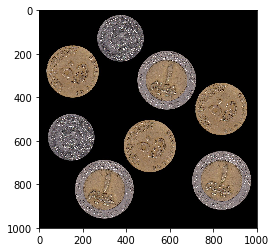

<Figure size 432x288 with 0 Axes>

In [16]:
filelist = glob.glob('/home/mahinour/Collage/Computer Vision/Vision Projects/Computer Vision  assignments/Coins Detection Using Hough Transform/Coins/*.jpg')
print(filelist)
try_image = filelist[2]
image = cv2.imread(try_image)
RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_image)
plt.figure()
plt.show()


# From RGB to Gray

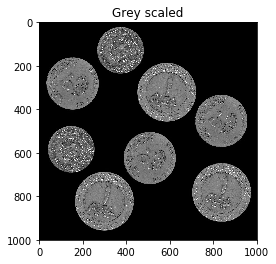

In [17]:
gray_image = cv2.cvtColor(RGB_image, cv2.COLOR_BGR2GRAY)
plt.title('Grey scaled')
plt.imshow(gray_image,  cmap='gray')
plt.show()

# Smoothing the image

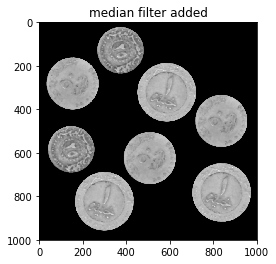

In [18]:
median = cv2.medianBlur(gray_image,7)
plt.figure()
plt.title('median filter added')
plt.imshow(median , cmap='gray')

# Edge Detection

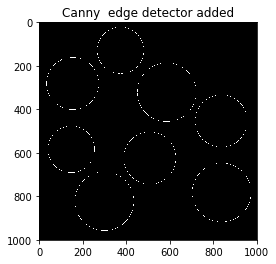

In [19]:
edges = cv2.Canny(median,250,280)
plt.figure()
plt.title('Canny  edge detector added')
plt.imshow(edges , cmap='gray')


# Accumulation into (a, b)-space using circular Hough transform

In [20]:
def detectCircles(edges, R):
    circles = []
    rows,coloumns = edges.shape
    
    accumulator = np.zeros((rows,coloumns))
 
    for u in range (rows):
        for v in range (coloumns):
            if edges[u,v]==255:
                 for angle in range(0,360): 
                        b = (int)(v - round(R * np.sin(angle * np.pi/180)  ))
                        a = (int)(u - round(R *np.cos(angle * np.pi/180) ))
                        if a >= 0 and a < rows and b >= 0 and b < coloumns: 
                            accumulator[a,b] += 1
                             

    return accumulator   

# Refining Coordinates and CHT Post-Processing

In [26]:
import math
def Peaks(R):
    Circles=[] # detector circles
    Count=0
    acc = detectCircles(edges,R) # getting the accumulator matrix
    acc[acc<(acc.max()-100)]=0  # taking the highest 100 peaks of the acc matrix as a start (smaller computation)
    while(acc.max()!=0):  #as lonng as the acc has a peak
        indices = np.unravel_index(np.argmax(acc, axis=None), acc.shape)  # getting the index of the maximum peak
        Count+=1 
        Circles.append((indices[0],indices[1],R)) # we have a circle chosen as a detector
        acc[indices]=0
        rows,cols = acc.shape
        for i in range (rows):
            for j in range (cols):    # here we search for nearby centers to exclude them and set their p
                if(acc[i][j]!=0):     
                    dist = int(np.fabs(indices[0]-i)) 
                    dist2 = int(np.fabs(indices[1]-j)) # the peaks that are close by 2R that means we assume no overlapping coins
                    if(dist<2*R and dist2 < 2*R): # change the 2R to R or smaller if we want to detect overlaps
                        acc[i][j]=0
    return Count,Circles

In [27]:
livre_count,red_cricles = Peaks(135)
print(livre_count)
fifty_count,blue_cricles = Peaks(120)
print(fifty_count)
quater_count,green_cricles = Peaks(107)
print(quater_count)

3
3
2


In [28]:
sum = livre_count + fifty_count*0.5 + quater_count*0.25
print(" sum = " + str(sum) + "L.E") 

 sum = 5.0L.E


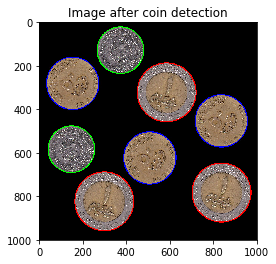

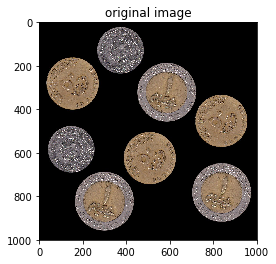

In [32]:
def draw(Circles, color=None):
    for vertex in Circles:
        cv2.circle(RGB_image,(vertex[1],vertex[0]),vertex[2],color,thickness=3)
RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
Original = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
draw(red_cricles,(255,0,0))
draw(blue_cricles,(0,0,255))
draw(green_cricles,(0,255,0))
fig = plt.figure()
plt.title('Image after coin detection')
plt.imshow(RGB_image)
fig2 = plt.figure()
plt.title('original image')
plt.imshow(Original)
plt.show()